In [12]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [ ]:
# Understand the Data Structure
# First, let's understand the dataset structure. Based on the snippet you provided, the data has the following columns:

# user_id: Unique identifier for each user.
# activity_date: Date of the purchase activity.
# product_group: Category of the product purchased (e.g., "Gold", "Promotion", "Remove Ads").
# dollar_purchase_value: Amount spent on the purchase.
# purchase_number: A sequential number indicating the order of purchases by the user.

In [20]:
df_data_in_app_purchases =pd.read_csv('data_in_app_purchases.csv')
df_data_in_app_purchases.head()

,user_id,activity_date,product_group,dollar_purchase_value,purchase_number
0,299207,01/03/2024,Gold,4.99,4
1,308639,20/04/2024,Promotion,4.99,1
2,292230,30/03/2024,Gold,9.99,13
3,300371,29/03/2024,Remove Ads,4.99,5
4,278774,16/04/2024,Promotion,4.99,5


In [23]:
# Basic Descriptive Statistics
# Get a sense of the overall data distribution and metrics:
# Descriptive statistics for numerical columns
print(df_data_in_app_purchases.describe())

# Unique counts and distribution in categorical columns
print(df_data_in_app_purchases['product_group'].value_counts())


             user_id                  activity_date  dollar_purchase_value  \
count    4230.000000                           4230            4182.000000   
mean   290851.391017  2024-03-30 21:47:34.468085248               5.995739   
min    272143.000000            2024-03-01 00:00:00               4.990000   
25%    281020.000000            2024-03-17 00:00:00               4.990000   
50%    290462.000000            2024-04-01 00:00:00               4.990000   
75%    300489.000000            2024-04-13 00:00:00               4.990000   
max    309395.000000            2024-05-01 00:00:00              29.990000   
std     11004.295679                            NaN               3.076473   

       purchase_number  
count      4230.000000  
mean         10.181560  
min           1.000000  
25%           2.000000  
50%           4.000000  
75%           9.000000  
max         152.000000  
std          20.503387  
product_group
Gold          1885
Promotion     1757
Remove Ads     588
N

In [24]:
# Identify Key Metrics and Patterns
# Here are some potential areas to explore for actionable insights:
# Top Products by Revenue
# Identify which product groups generate the most revenue:
# Group by 'product_group' and calculate total revenue
product_revenue = df_data_in_app_purchases.groupby('product_group')['dollar_purchase_value'].sum().sort_values(ascending=False)
print(product_revenue)


product_group
Gold          12351.19
Promotion     10008.43
Remove Ads     2714.56
Name: dollar_purchase_value, dtype: float64


month
2024-03    12478.18
2024-04    12376.36
2024-05      219.64
Freq: M, Name: dollar_purchase_value, dtype: float64


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month', ylabel='Total Revenue'>

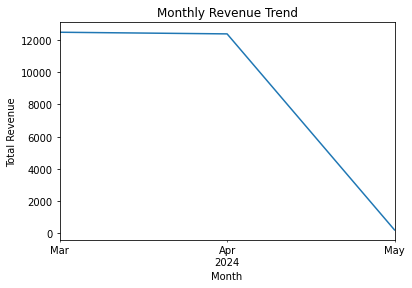

In [25]:
# Purchase Trends Over Time
# Analyze how purchases change over time (e.g., by month or week):
# Add a 'month' column to analyze monthly trends
df_data_in_app_purchases['month'] = df_data_in_app_purchases['activity_date'].dt.to_period('M')

# Group by 'month' and calculate total revenue
monthly_revenue = df_data_in_app_purchases.groupby('month')['dollar_purchase_value'].sum()
print(monthly_revenue)

# Plot the monthly revenue trends
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', xlabel='Month', ylabel='Total Revenue')


       total_purchases  total_spend
count      1042.000000  1042.000000
mean          4.059501    24.063512
std           7.885730    56.015340
min           1.000000     0.000000
25%           1.000000     4.990000
50%           2.000000     9.980000
75%           4.000000    24.950000
max         152.000000  1240.720000


<Axes: title={'center': 'Distribution of User Spend'}, xlabel='Total Spend', ylabel='Frequency'>

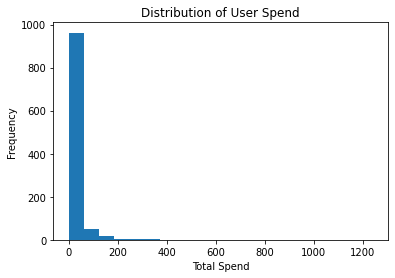

In [26]:
# User Purchase Behavior
# Analyze how frequently users make purchases and how much they spend:
# Calculate total purchases and total spend per user
user_purchase_behavior = df_data_in_app_purchases.groupby('user_id').agg(
    total_purchases=('purchase_number', 'max'),
    total_spend=('dollar_purchase_value', 'sum')
)
print(user_purchase_behavior.describe())

# Plot distribution of total spend
user_purchase_behavior['total_spend'].plot(kind='hist', bins=20, title='Distribution of User Spend', xlabel='Total Spend')


In [27]:
# Identify High-Value Customers
# Find users who spend the most or make the most frequent purchases:
# Top 10 users by total spend
top_spenders = user_purchase_behavior.sort_values(by='total_spend', ascending=False).head(10)
print(top_spenders)

# Top 10 users by number of purchases
top_buyers = user_purchase_behavior.sort_values(by='total_purchases', ascending=False).head(10)
print(top_buyers)


         total_purchases  total_spend
user_id                              
279199               128      1240.72
282798               152       758.48
292230                47       334.53
284707                37       314.63
279328                33       309.67
299527                49       269.51
280804                19       249.81
276293                37       199.63
305048                24       194.76
299270                36       194.64
         total_purchases  total_spend
user_id                              
282798               152       758.48
279199               128      1240.72
299527                49       269.51
292230                47       334.53
276293                37       199.63
284707                37       314.63
299270                36       194.64
279328                33       309.67
283220                32       169.68
299625                31       164.69


In [28]:
# Promotion Effectiveness
# Evaluate how promotions are affecting purchases and revenue:
# Filter purchases made through promotions
promotion_purchases = df_data_in_app_purchases[df_data_in_app_purchases['product_group'] == 'Promotion']

# Calculate the revenue generated by promotions
promotion_revenue = promotion_purchases['dollar_purchase_value'].sum()
print(f"Total revenue from promotions: ${promotion_revenue:.2f}")

# Compare promotion purchases to other product groups
purchase_comparison = df_data_in_app_purchases['product_group'].value_counts()
print(purchase_comparison)


Total revenue from promotions: $10008.43
product_group
Gold          1885
Promotion     1757
Remove Ads     588
Name: count, dtype: int64



After performing the analysis, interpret the findings to generate actionable insights. Here are a few examples:

High-Performing Products: Focus on promoting and developing high-revenue product groups.
User Segmentation: Tailor marketing strategies for high-value customers or frequent buyers.
Promotion Strategy: Refine promotional offers based on their effectiveness in driving revenue.

In [29]:
# Convert 'activity_date' to datetime format
df_data_in_app_purchases['activity_date'] = pd.to_datetime(df_data_in_app_purchases['activity_date'], format='%d/%m/%Y')

# Calculate total purchase value and total number of purchases per user
user_purchase_summary_inApp = df_data_in_app_purchases.groupby('user_id').agg(
    total_purchase_value_inApp=('dollar_purchase_value', 'sum'),
    total_purchases_inApp=('purchase_number', 'count'),
    first_purchase_date_inApp = ('activity_date','min'),
    last_purchase_date_inApp=('activity_date','max'),
    number_of_purchase_days_inApp=('activity_date','nunique')
).reset_index()

# Calculate average purchase per user
user_purchase_summary_inApp['average_purchase_value_inApp'] = round(user_purchase_summary_inApp['total_purchase_value_inApp'] / user_purchase_summary_inApp['total_purchases_inApp'],2)

# Display the average purchase value per user
user_purchase_summary_inApp

,user_id,total_purchase_value_inApp,total_purchases_inApp,first_purchase_date_inApp,last_purchase_date_inApp,number_of_purchase_days_inApp,average_purchase_value_inApp
0,272143,4.99,1,2024-03-01,2024-03-01,1,4.99
1,272161,9.99,1,2024-04-15,2024-04-15,1,9.99
2,272164,129.94,6,2024-04-15,2024-05-01,4,21.66
3,272189,89.86,14,2024-03-06,2024-04-21,10,6.42
4,272192,9.98,2,2024-04-14,2024-04-14,1,4.99
...,...,...,...,...,...,...,...
1037,309220,64.88,12,2024-03-10,2024-04-27,11,5.41
1038,309232,14.97,3,2024-03-08,2024-04-02,2,4.99
1039,309279,4.99,1,2024-04-02,2024-04-02,1,4.99
1040,309320,4.99,1,2024-04-12,2024-04-12,1,4.99


In [30]:
user_purchase_summary_inApp.to_csv('user_purchase_summary_inApp.csv',index=False)